# HW3-ProcessMining-TAClass

## Team members:

* Sina Aghaee
* Farzaneh Mahmoodi
* Sahar Varchandi

## Dataset

Our project contains **five** different related datasets, which can be downloaded from the following links:

* [BPI Challenge 2016: Clicks NOT Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_NOT_Logged_In/12708596/1)

* [BPI Challenge 2016: Clicks Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_Logged_In/12674816/1)

* [BPI Challenge 2016: Questions](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Questions/12687320/1)

* [BPI Challenge 2016: Werkmap Messages](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Werkmap_Messages/12714569/1)

* [BPI Challenge 2016: Complaints](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Complaints/12717647/1)


Importing Libraries:

In [209]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Reading Datasets:

In [3]:
clicks_logged_in = pd.read_csv('BPI2016_Clicks_Logged_In.csv', sep = ';', encoding = 'latin')
phone_calls = pd.read_csv('BPI2016_Questions.csv', sep = ';', encoding = 'latin')
workflow_messages = pd.read_csv('BPI2016_Werkmap_Messages.csv', sep = ';', encoding = 'latin')
complaints = pd.read_csv('BPI2016_Complaints.csv', sep = ';', encoding = 'latin')

In [48]:
clicks_logged_in.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
clicks_logged_in.shape

(7174934, 20)

In [49]:
phone_calls.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ContactDate,ContactTimeStart,ContactTimeEnd,QuestionThemeID,QuestionSubthemeID,QuestionTopicID,QuestionTheme,QuestionSubtheme,QuestionTopic,QuestionTheme_EN,QuestionSubtheme_EN,QuestionTopic_EN
0,1876596,18-29,M,257,261,2015-08-24,14:00:34.0000000,14:05:23.0000000,41,28861,28896,WN WW,Sollicitatie (WWZ 1-7-2015),Sollicitatieplicht: Moet ik solliciteren als i...,WN WW,Application (WWZ 1 7 2015),Job Duty: Should I apply if I go back to work?
1,722160,18-29,M,305,305,2015-08-27,11:50:08.0000000,11:55:34.0000000,41,15159,11672,WN WW,Betaling,Wanneer is/wordt mijn WW-uitkering overgemaakt?,WN WW,Payment,When is/are transferred my unemployment benefits?


In [108]:
phone_calls.shape

(123403, 17)

In [55]:
workflow_messages.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,EventDateTime,EventType,HandlingChannelID
0,2032131,18-29,M,271,271,2015-11-02 01:36:53.0000000,Werkmap message,1
1,2032131,18-29,M,271,271,2015-11-05 21:35:43.0000000,Werkmap message,1


In [109]:
workflow_messages.shape

(66058, 8)

In [281]:
complaints.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ComplaintDossierID,ComplaintID,ContactDate,ContactChannelID,ComplaintThemeID,ComplaintSubthemeID,ComplaintTopicID,ComplaintTheme,ComplaintSubtheme,ComplaintTopic,ComplaintTheme_EN,ComplaintSubtheme_EN,ComplaintTopic_EN
0,1945807,50-65,M,230,233,197,220,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,(Revision) Decision not/too late taken
1,733565,30-39,M,296,290,198,221,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,(Revision) Decision not/too late taken


In [111]:
complaints.shape

(289, 18)

## Simplifying and Merging the Four Datasets

To merge the four datasets based on CustomerId first, we need to simplify our data in a way that we have similar columns for each one:

### Complaints Dataset

Since the complaints dataset doesn't comprise time and only have dates, to make this data set consistent with the other three datasets, we will generate random times, and we will add it to our data:

In [342]:
#defining a function to generate random datetime

def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit) 

In [328]:
# genertating 289 (number of complaints dataset records) random datetimes
start = pd.to_datetime('2000-01-01')
end = pd.to_datetime('2005-01-01')
random_datetime =random_datetimes_or_dates(start, end, out_format='datetime', n=289)
random_datetime = pd.DataFrame(random_datetime)
random_datetime.head(2)

,0
0,2001-10-07 14:31:31
1,2000-04-27 16:35:25


In [340]:
# since complaints dataset has dates itself, we only need the random times so we divide random datetimes to date and time columns

random_datetime['Time'] = pd.to_datetime(random_datetime[0]).dt.time
random_datetime.head(2)

,0,Time
0,2001-10-07 14:31:31,14:31:31
1,2000-04-27 16:35:25,16:35:25


In [341]:
# Here we combine actual dates from complaints dataset with random times we genereted to create a complete datetime column 

complaints_datetime = pd.DataFrame(data={'date': complaints.ContactDate, 'time' : random_datetime['Time']})
complaints_datetime['date'] = pd.to_datetime(complaints_datetime['date']).dt.date
complaints_datetime['datetime'] = complaints_datetime.apply(lambda r : pd.datetime.combine(r['date'],r['time']),1)
complaints_datetime.head()

,date,time,datetime
0,2016-01-12,14:31:31,2016-01-12 14:31:31
1,2016-01-12,16:35:25,2016-01-12 16:35:25
2,2016-02-01,09:33:39,2016-02-01 09:33:39
3,2015-12-11,09:57:48,2015-12-11 09:57:48
4,2015-07-07,07:50:10,2015-07-07 07:50:10


In [331]:
## Simplify complaints

complaints_simp = pd.DataFrame(data={'customerID': complaints.CustomerID, "activity" : "complaint", "date" : complaints_datetime['datetime']})
complaints_simp.head()


,customerID,activity,date
0,1945807,complaint,2016-01-12 14:31:31
1,733565,complaint,2016-01-12 16:35:25
2,413563,complaint,2016-02-01 09:33:39
3,2027840,complaint,2015-12-11 09:57:48
4,1202227,complaint,2015-07-07 07:50:10


In [81]:
## Simplify phone_calls

phone_calls_simp = pd.DataFrame(data={'customerID': phone_calls.CustomerID, "activity" : "phone_call", "date" : phone_calls.ContactDate +' '+ phone_calls.ContactTimeStart})
phone_calls_simp['date'] = pd.to_datetime(phone_calls_simp['date'])
phone_calls_simp.head()


,customerID,activity,date
0,1876596,phone_call,2015-08-24 14:00:34
1,722160,phone_call,2015-08-27 11:50:08
2,1536943,phone_call,2015-08-20 11:01:16
3,1816718,phone_call,2015-08-27 12:19:28
4,1983285,phone_call,2015-08-27 13:54:03


In [71]:
## Simplify workflow_messages

workflow_messages_simp = pd.DataFrame(data={'customerID': workflow_messages.CustomerID, "activity" : "workflow_message", "date" : workflow_messages.EventDateTime})
workflow_messages_simp['date'] = pd.to_datetime(workflow_messages_simp['date'])
workflow_messages_simp.head()


,customerID,activity,date
0,2032131,workflow_message,2015-11-02 01:36:53
1,2032131,workflow_message,2015-11-05 21:35:43
2,2032131,workflow_message,2015-11-06 15:47:15
3,2085395,workflow_message,2015-10-20 23:44:39
4,2085395,workflow_message,2016-01-20 23:04:25


In [72]:
## Simplify clicks_logged_in

clicks_logged_in_simp = pd.DataFrame(data={'customerID': clicks_logged_in.CustomerID, "activity" : "surfing_webpages", "date" : clicks_logged_in.TIMESTAMP})
clicks_logged_in_simp['date'] = pd.to_datetime(clicks_logged_in_simp['date'])
clicks_logged_in_simp.head()


,customerID,activity,date
0,2025826,surfing_webpages,2015-10-05 10:12:56.880
1,2025826,surfing_webpages,2015-09-30 15:14:35.943
2,1503890,surfing_webpages,2015-09-01 19:35:06.707
3,2063574,surfing_webpages,2015-11-06 10:47:42.137
4,2185161,surfing_webpages,2016-01-11 18:44:07.877


In [343]:
## Merging the four simplified datasets

simple_customer_journey = pd.concat([clicks_logged_in_simp, workflow_messages_simp,phone_calls_simp ,complaints_simp])
log_csv = simple_customer_journey.copy()
log_csv.sort_values(by='date', ascending=True)


,customerID,activity,date
9217,1297588,workflow_message,2015-07-01 00:26:11.000
29692,2035791,workflow_message,2015-07-01 00:42:30.000
39687,2016236,workflow_message,2015-07-01 00:43:59.000
59798,2040395,workflow_message,2015-07-01 01:07:41.000
3271608,797444,surfing_webpages,2015-07-01 02:36:59.713
...,...,...,...
121961,602197,phone_call,2016-02-29 17:00:10.000
122567,2106983,phone_call,2016-02-29 17:00:28.000
64831,2237416,phone_call,2016-02-29 17:03:09.000
121246,2106983,phone_call,2016-02-29 17:04:14.000


In [345]:
log_csv.dtypes

customerID             int64
activity              object
date          datetime64[ns]
dtype: object

In [344]:
## Write to csv file for analysis wtih Disco
#log_csv.to_csv('log.csv',index=False)

In [334]:
# Shape
log_csv.shape

(7364684, 3)

In [335]:
# Check NA-values
log_csv.isna().sum()

customerID    0
activity      0
date          0
dtype: int64

In [336]:
# Info
log_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7364684 entries, 0 to 288
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   customerID  int64         
 1   activity    object        
 2   date        datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 224.8+ MB


In [337]:
# Sample
log_csv.sample(frac=.25)

,customerID,activity,date
5622307,1742937,surfing_webpages,2015-08-31 11:57:35.087
1272174,2097690,surfing_webpages,2016-01-19 15:10:22.567
6205871,2057109,surfing_webpages,2015-08-19 15:25:38.887
6163210,250421,surfing_webpages,2015-08-31 10:18:06.747
6454015,2185448,surfing_webpages,2015-12-22 15:02:24.057
...,...,...,...
5794942,2014488,surfing_webpages,2015-09-08 23:01:58.607
2592654,2214813,surfing_webpages,2016-01-27 19:11:30.193
2281506,2045367,surfing_webpages,2015-11-07 12:53:18.947
1781919,2220383,surfing_webpages,2016-02-26 10:20:33.703


In [138]:
log_csv = log_csv.rename(columns={'customerID': 'case_id','date': 'timestamp' })

In [338]:
# Unique values
pd.DataFrame(
    {
        'variable': log_csv.columns, 
        'unique values': [log_csv[col].nunique() for col in log_csv.columns],
        'fraction': [round(log_csv[col].nunique() / log_csv.shape[0], 2) for col in log_csv.columns], 
    }
).set_index('variable')

,unique values,fraction
variable,,
customerID,27412,0.0
activity,4,0.0
date,7350912,1.0


In [128]:
log_csv['case_id']

0      2025826
1      2025826
2      1503890
3      2063574
4      2185161
        ...   
284    1373382
285    1604792
286    1774398
287    1840727
288    1604792
Name: case_id, Length: 7364684, dtype: int64

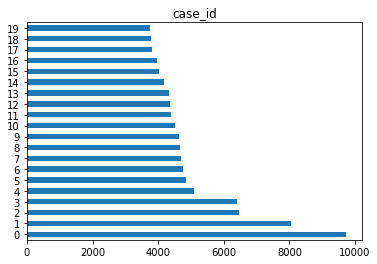

In [140]:
# Value counts: case_id
log_csv.case_id.value_counts().head(20).reset_index(drop=True).plot(y='case_id', kind='barh', title='case_id')
plt.show()

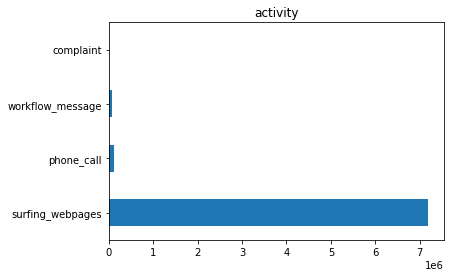

In [141]:
# Value counts: activity
log_csv.activity.value_counts().plot(y='activity', kind='barh', title='activity')
plt.show()

In [159]:
activity_counts=pd.DataFrame(log_csv['activity'].value_counts())
activity_counts

,activity
surfing_webpages,7174934
phone_call,123403
workflow_message,66058
complaint,289


In [142]:
# Unique values: timestamp
log_csv.timestamp.nunique()

7350761

In [143]:
# Multiple occurences: timestamp
log_csv.timestamp.value_counts()[log_csv.timestamp.value_counts() > 1]

2015-12-01 00:00:01.000    13
2015-12-02 00:00:01.000     9
2016-02-01 00:00:01.000     8
2016-01-05 00:00:01.000     7
2016-01-12 00:00:01.000     6
                           ..
2015-11-11 13:11:02.597     2
2015-08-23 20:58:56.867     2
2016-02-03 13:14:32.440     2
2015-11-05 09:45:20.127     2
2016-01-18 11:28:10.197     2
Name: timestamp, Length: 13785, dtype: int64

In [144]:
def activity_duration(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    """
    Returns a dataframe with activity durations (i.e. 'arc' performance decorators).
    By default duration is set to hours (h).
    Use 's' for seconds, 'D' for days and 'W' for weeks.
    """
    
    data = dict()
    groups = log_csv.groupby(case_var)
    for group in groups:
        arc = group[1].sort_values(timestamp_var)\
        .rename(columns = {event_var:'event_from', timestamp_var:'time_from'})
        arc['event_to'] = arc['event_from'].shift(-1)
        arc['time_to'] = arc['time_from'].shift(-1)
        arc.dropna(inplace = True)
        duration_var = f'duration ({duration})'
        arc[duration_var] = (arc['time_to'] - arc['time_from']) / np.timedelta64(1, duration)
        data[group[0]] = arc[[case_var, 'event_from', 'event_to', 'time_from', 'time_to', duration_var]]
    return pd.concat(data.values()).set_index(case_var)

In [148]:
log_csv_Durations = activity_duration(log_csv, 'case_id', 'activity', 'timestamp') 
log_csv_Durations

,event_from,event_to,time_from,time_to,duration (h)
case_id,,,,,
220,phone_call,phone_call,2015-09-30 11:55:16.000,2015-09-30 12:06:27.000,0.186389
220,phone_call,phone_call,2015-09-30 12:06:27.000,2015-10-01 11:57:15.000,23.846667
220,phone_call,phone_call,2015-10-01 11:57:15.000,2015-10-15 15:15:31.000,339.304444
220,phone_call,phone_call,2015-10-15 15:15:31.000,2015-11-17 11:52:11.000,788.611111
220,phone_call,surfing_webpages,2015-11-17 11:52:11.000,2015-12-07 10:08:14.883,478.267745
...,...,...,...,...,...
2240448,surfing_webpages,surfing_webpages,2016-02-28 13:27:17.477,2016-02-28 13:27:33.703,0.004507
2240448,surfing_webpages,surfing_webpages,2016-02-28 13:27:33.703,2016-02-28 13:27:53.247,0.005429
2240448,surfing_webpages,surfing_webpages,2016-02-28 13:27:53.247,2016-02-28 13:27:59.707,0.001794


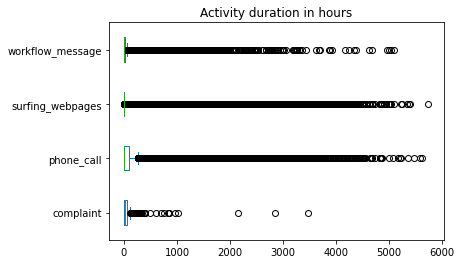

In [147]:
# Boxplot activity duration

log_csv_Durations\
.loc[:, ['event_from', 'event_to', 'duration (h)']]\
.reset_index()\
.pivot(columns='event_from', values='duration (h)')\
.plot(kind='box', vert=False, title='Activity duration in hours')
plt.show()

In [175]:
log_csv_sample = log_csv.sample(frac=.0001)

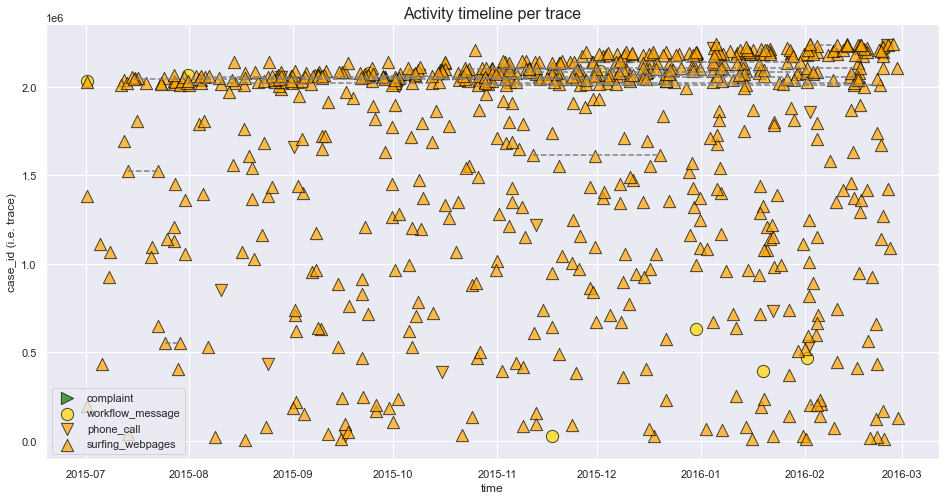

In [176]:
# Visualize eventlog ##########################################################

# Settings
activity = {
    'complaint': ('>', 'green'), 
    'workflow_message': ('o', 'gold'), 
    'phone_call': ('v', 'orange'), 
    'surfing_webpages': ('^', 'orange'), 
}

# Figure
fig, ax = plt.subplots(figsize=(16, 8))

# Timelines
for timeline in log_csv_sample.groupby('case_id').agg(time_start = ('timestamp', min), 
                                               time_end = ('timestamp', max)
                                              ).reset_index().itertuples(index=False):
    plt.hlines(timeline.case_id, timeline.time_start, timeline.time_end, 
               colors = 'grey', linestyles = 'dashed')

# Activities
for act in activity.keys():
    ax.scatter(log_csv_sample.loc[log_csv_sample.activity == act, 'timestamp'], 
               log_csv_sample.loc[log_csv_sample.activity == act, 'case_id'],
               marker = activity[act][0],
               color = activity[act][1], 
               s = 150, 
               alpha = .7,
               label = act,
               edgecolors = 'black',
              )
    
ax.set_title('Activity timeline per trace', fontsize=16)
ax.set_xlabel('time')
ax.set_ylabel('case_id (i.e. trace)')
ax.legend()
ax.grid(True)

In [165]:
def dfg_frequency_matrix(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str
) -> pd.DataFrame:
    
    """
    Return a directly-follows graph frequency matrix based on the traces in the event log.
    Row events (i.e. the index) are events 'from' and column events are the events 'to'.
    """
    
    # event log
    log = event_log[[case_var, event_var, timestamp_var]]
    
    # initiate matrix
    events = log[event_var].unique()
    matrix = pd.DataFrame(columns=events, index=events).fillna(0)
    
    # groupby case_var
    groups = log.groupby(case_var)
    
    # loop through case groups
    for group in groups:
        event = group[1].sort_values(timestamp_var)\
        .drop([case_var, timestamp_var], axis = 1)\
        .rename(columns = {event_var:'event_from'})
        event['event_to'] = event['event_from'].shift(-1)
        event.dropna(inplace = True)
        
        # loop through traces
        for trace in event.itertuples(index = False):
            matrix.at[trace.event_from, trace.event_to] += 1
                
    return matrix.replace(0, np.nan)

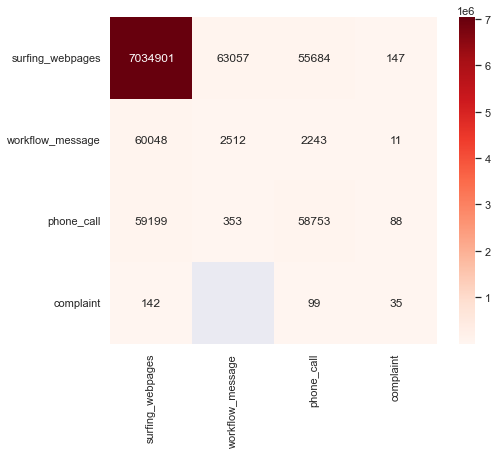

In [168]:
# Directly-Follows Graph frequency heatmap
dfg_freq_matrix = dfg_frequency_matrix(log_csv, 'case_id', 'activity', 'timestamp')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(dfg_freq_matrix, annot=True, fmt='.0f', cmap='Reds', square=True)
plt.show()

In [169]:
def dfg_performance_matrix(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    """
    Return a directly-follows graph duration matrix based on the traces in the event log.
    Row events (i.e. the index) are events 'from' and column events are the events 'to'.
    By default duration is set to hours (h). Use 's' for seconds, 'D' for days and 'W' for weeks.
    """
    
    # event log
    log = event_log[[case_var, event_var, timestamp_var]]
    
    # initiate matrix
    events = log[event_var].unique()
    matrix = pd.DataFrame(columns=events, index=events)
    
    # groupby case_var
    groups = log.groupby(case_var)
    
    # loop through case groups
    for group in groups:
        event = group[1].sort_values(timestamp_var)\
        .rename(columns = {event_var:'event_from', timestamp_var:'time_begin'})
        event['event_to'] = event['event_from'].shift(-1)
        event['time_end'] = event['time_begin'].shift(-1)
        event['duration'] = (event['time_end'] - event['time_begin']) / np.timedelta64(1, duration)
        event.dropna(inplace = True)
        
        # loop through traces
        for row in event.itertuples(index = False):
            matrix.at[row.event_from, row.event_to] = \
            np.nansum([matrix.at[row.event_from, row.event_to], row.duration])
    
    return matrix.astype(float)

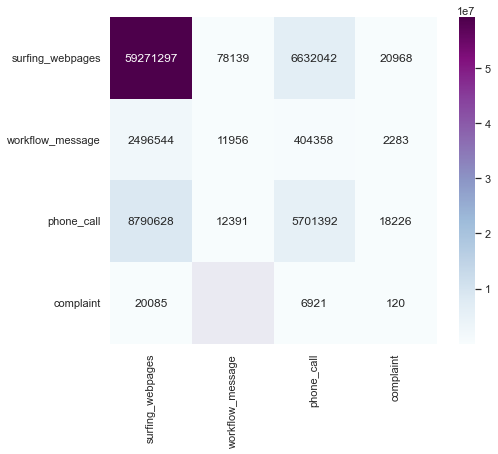

In [170]:
# Directly-Follows Graph total duration heapmap (in hours)
dfg_perf_matrix = dfg_performance_matrix(log_csv, 'case_id', 'activity', 'timestamp', duration='h')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(dfg_perf_matrix, annot=True, fmt='.0f', cmap='BuPu', square=True)
plt.show()

In [177]:
def dfg_frequency_table(dfg_frequency_matrix: pd.DataFrame) -> pd.DataFrame:
    
    """
    Returns an directly-follows graph frequency table
    """
    
    arcs = list()
    
    for row in dfg_frequency_matrix.index:
        for col in dfg_frequency_matrix.columns:
            if not np.isnan(dfg_frequency_matrix.at[row, col]):
                arcs.append((row, col, dfg_frequency_matrix.at[row, col]))
    
    arc_freq = pd.DataFrame(arcs, columns = ['event_from', 'event_to', 'frequency'])\
    .set_index(['event_from', 'event_to'])
    
    return arc_freq

In [178]:
# Directly-Follows Graph frequency and performance (in hours) table
df = pd.merge(
    dfg_frequency_table(
        dfg_frequency_matrix(log_csv, 'case_id', 'activity', 'timestamp'))\
    .reset_index(),
    activity_duration(log_csv, 'case_id', 'activity', 'timestamp')\
    .loc[:, ['event_from', 'event_to', 'duration (h)']]\
    .groupby(by = ['event_from', 'event_to']).mean('duration (h)')\
    .reset_index(),

    left_on = ['event_from', 'event_to'],
    right_on = ['event_from', 'event_to']
).rename(columns = {'duration (h)':'average_duration'})

df['average_duration'] = df['average_duration'].apply(lambda x: np.round(x, decimals=2))
df['frequency'] = df['frequency'].astype(int)
df['total_duration'] = df['frequency'] * df['average_duration']

df.sort_values(['total_duration', 'average_duration', 'frequency'], ascending=False)

,event_from,event_to,frequency,average_duration,total_duration
0,surfing_webpages,surfing_webpages,7034901,8.43,59304215.43
8,phone_call,surfing_webpages,59199,148.49,8790459.51
2,surfing_webpages,phone_call,55684,119.10,6631964.40
10,phone_call,phone_call,58753,97.04,5701391.12
4,workflow_message,surfing_webpages,60048,41.58,2496795.84
6,workflow_message,phone_call,2243,180.28,404368.04
1,surfing_webpages,workflow_message,63057,1.24,78190.68
3,surfing_webpages,complaint,147,142.64,20968.08
12,complaint,surfing_webpages,142,141.45,20085.90
11,phone_call,complaint,88,207.11,18225.68
